In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Optional: set matplotlib inline if using a Jupyter Notebook
%matplotlib inline

In [9]:
# Read in the data
df = pd.read_csv('api_data/aggregated_daily_measurements.csv')
df.set_index("Day", inplace=True)
df.index = pd.to_datetime(df.index)

# Combine solar and grid readings
df['Total_consumption'] = df['Grid Organi lbc'] + df['Solar']

# Drop unwanted columns
df.drop(['Chargers achteraan','Solar','Chargers', 'Grid Organi lbc'], axis=1, inplace=True)

# Ensure index is only dates (no specific times)
df.index = df.index.normalize()

# Define Period 1 (to be removed)
period1_start = '2022-09-28'
period1_end   = '2024-07-27'

# Ensure the date range is valid
if df.index.min() <= pd.to_datetime(period1_start) and df.index.max() >= pd.to_datetime(period1_end):
    df_period1 = df.loc[period1_start:period1_end].copy()
    df_remaining = df.drop(df_period1.index)
else:
    print("Warning: Date range is out of bounds.")
    df_remaining = df.copy()

# Save cleaned data
df_remaining.to_csv('api_data/daily_cleaned_2.csv')


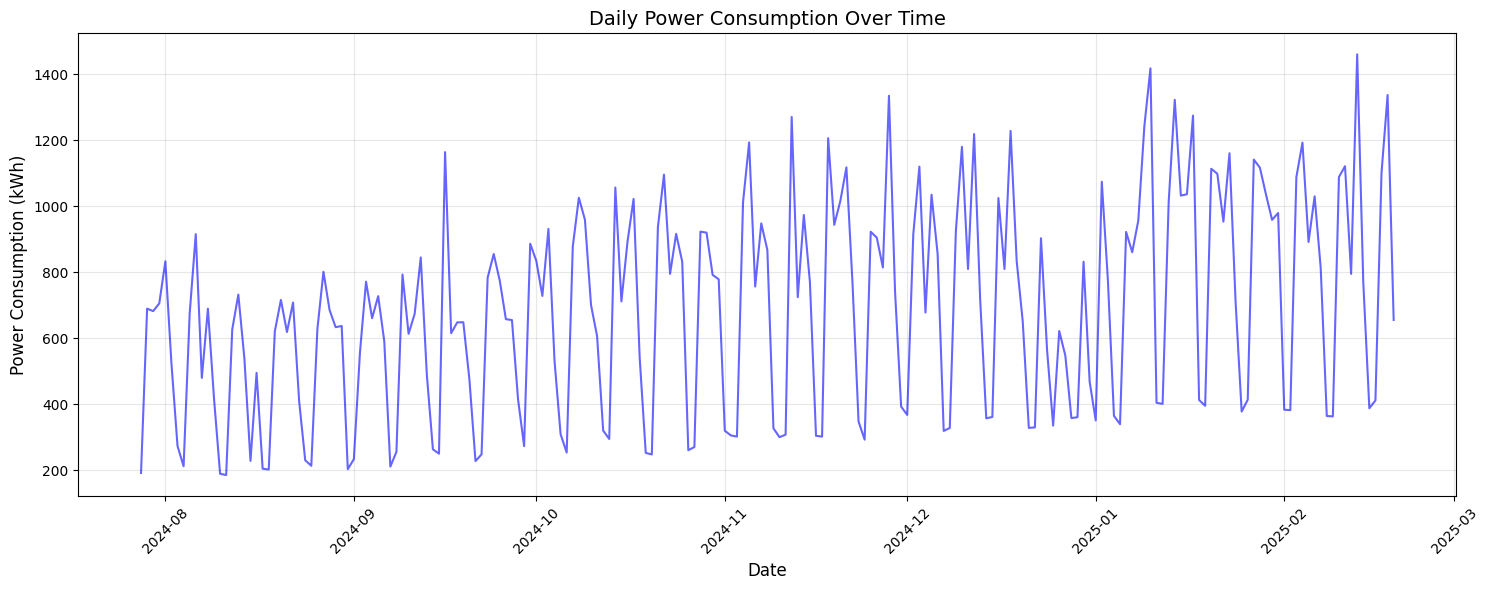

,Total_consumption
Day,
2022-09-28,161.4850
2022-09-29,396.6727
2022-09-30,359.5532
2022-10-01,213.6044
2022-10-02,205.0945
...,...
2025-02-15,388.5460
2025-02-16,412.1156
2025-02-17,1101.3619


In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df_remaining.index, df_remaining['Total_consumption'], color='blue', alpha=0.6)
plt.title('Daily Power Consumption Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption (kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df

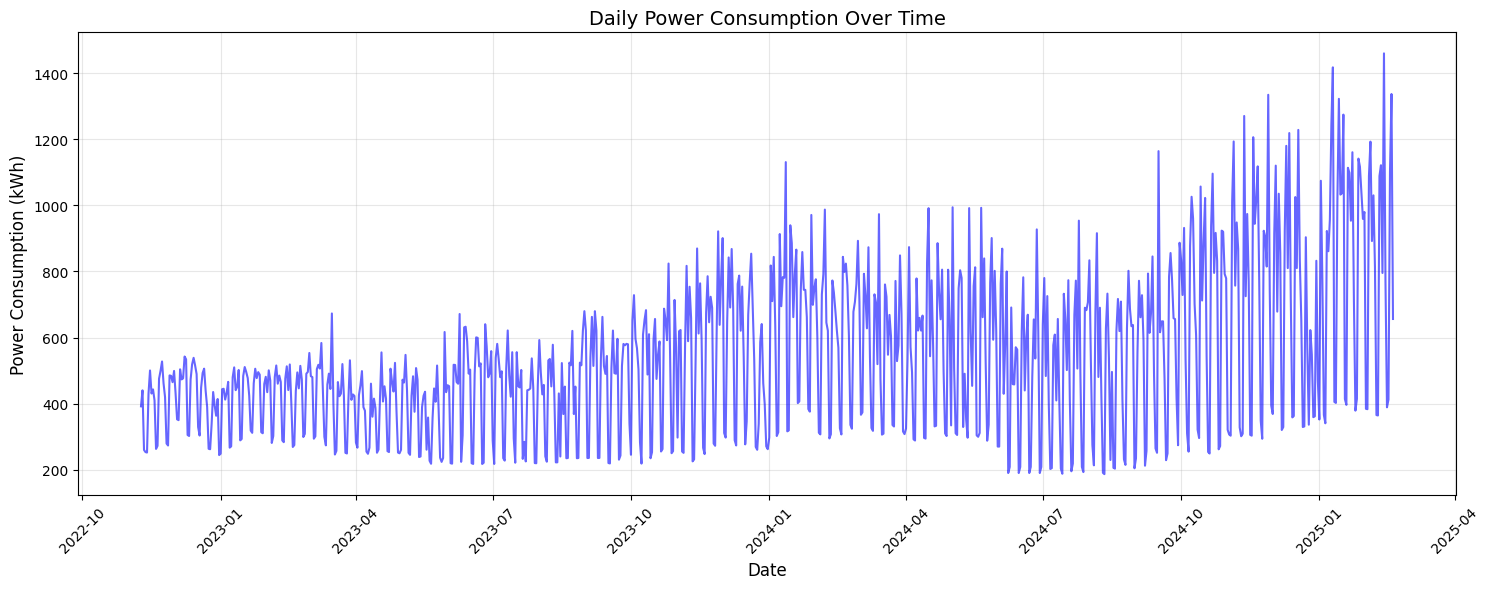

,Total_consumption
Day,
2022-09-28,161.4850
2022-09-29,396.6727
2022-09-30,359.5532
2022-10-01,213.6044
2022-10-02,205.0945
...,...
2025-02-15,388.5460
2025-02-16,412.1156
2025-02-17,1101.3619


In [69]:
plt.figure(figsize=(15, 6))
plt.plot(df_final.index, df_final['Total_consumption'], color='blue', alpha=0.6)
plt.title('Daily Power Consumption Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption (kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df

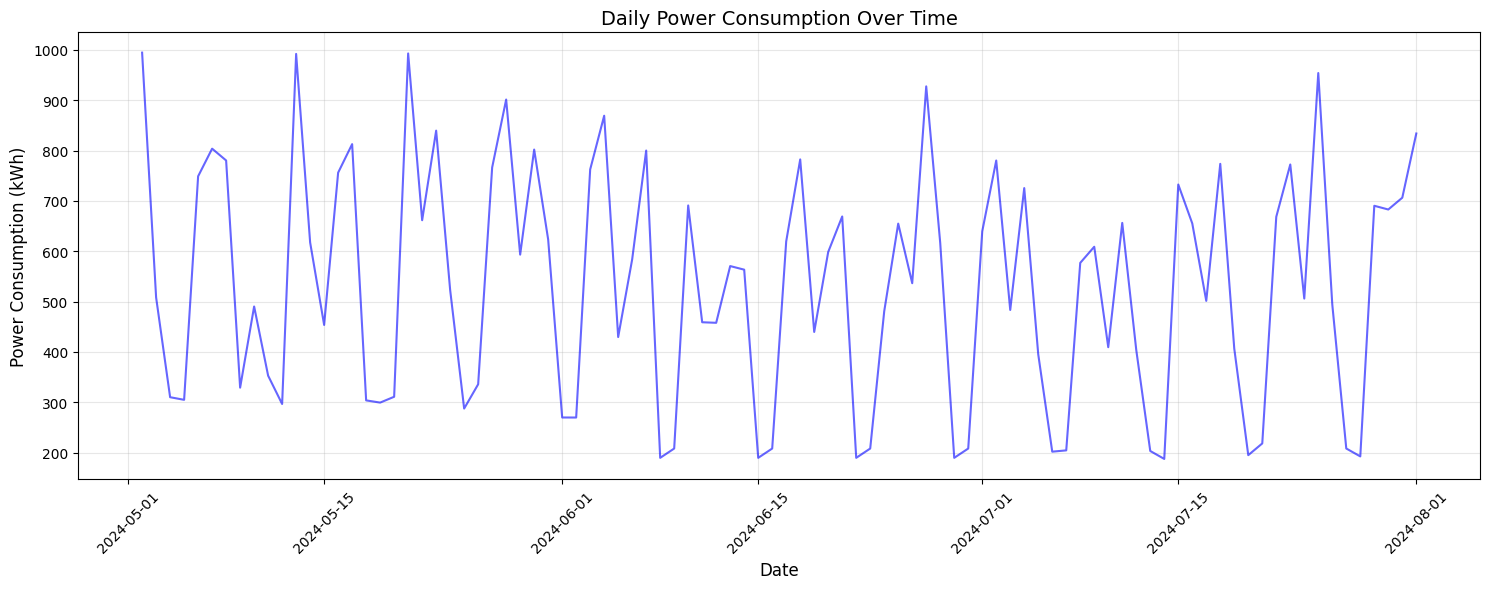

In [63]:
# Ensure the index is a DatetimeIndex first
df.index = pd.to_datetime(df.index)

# Filter the DataFrame by the date range
df_filtered = df_final.loc['2024-05-01 12:00:00':'2024-08-01 12:00:00']

plt.figure(figsize=(15, 6))
plt.plot(df_filtered.index, df_filtered['Total_consumption'], color='blue', alpha=0.6)
plt.title('Daily Power Consumption Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption (kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()